In [1]:
import numpy     as np
import pandas    as pd
import os
import re
import sys
import json
import time
import base64

import requests
import warnings 

import geopandas as gpd

In [2]:
al = gpd.read_file("/Users/aurelianosancho/Dropbox/Lockup_table/AL_Municipios_2020/AL_Municipios_2020.shp")

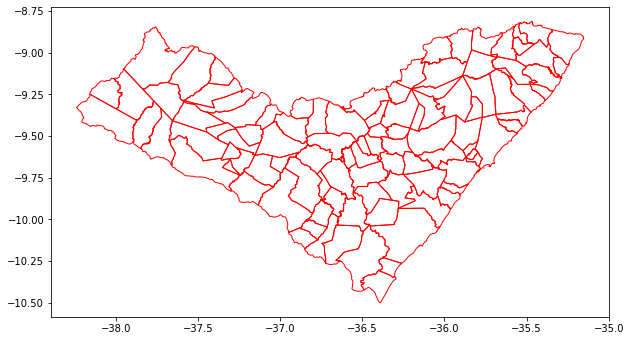

In [3]:
al.plot(figsize=(10,6), edgecolor="red", facecolor="None")

# Download data in Copoernicus 
 There are two ways to downloads the data in copernicus:
 * Using the toolbox-editor 
 * Directly using python or R

## Using Toolbox

import cdstoolbox as ct


@ct.application(title='temperatura')
@ct.output.download()
def application():

   
    data = ct.catalogue.retrieve(
        'reanalysis-era5-single-levels',
        {
             'product_type': 'reanalysis',
             'variable': '2m_temperature',
        #     'variable': '10m_u_component_of_wind', 
        #    'variable': '10m_v_component_of_wind',
        #    'variable': 'surface_pressure',
        #    'variable': 'total_precipitation',
   
      #          'year': ['1979','1980',],
      #          'year': ['1981','1982','1983','1984','1985',],
      #          'year': ['1986','1987','1988','1989','1990',],          
      #          'year': ['1991','1992','1993','1994','1995',],   
      #          'year': ['1996','1997','1998','1999','2000',],             
      #          'year': ['2001','2002','2003','2004','2005',],           
      #          'year': ['2006','2007','2008','2009','2010',],              
      #          'year': ['2011','2012','2013','2014','2015',],  
                 'year': ['2020',],
      #          'year': ['2021',],  
            
            'month': [
                '01', '02', '03', '04', '05', '06',
                '07', '08', '09', '10', '11', '12'
            ],
            
            'day': [
                '01', '02', 
                #'03', '04', '05', '06',
                #'07', '08', '09', '10', '11', '12',
                #'13', '14', '15', '16', '17', '18',
               # '19', '20', '21', '22', '23', '24',
               # '25', '26', '27', '28', '29', '30',
               # '31'
            ],
            
            'area': [6, -74, -35, -35,
            ],

	        'grid': ['0.25','0.25'],
            
            'time': [
                '00:00', '01:00', '02:00',
                '03:00', '04:00', '05:00',
                '06:00', '07:00', '08:00',
                '09:00', '10:00', '11:00',
                '12:00', '13:00', '14:00',
                '15:00', '16:00', '17:00',
                '18:00', '19:00', '20:00',
                '21:00', '22:00', '23:00',
            ],
        }
    )
    
    #data_location = ct.geo.extract_point(ct.cube.select(data, time=year), lon=lon, lat=lat)
    
    daily_mean = ct.climate.daily_mean(data)
    #daily_std = ct.climate.daily_std(data)
    return(daily_mean)

In [6]:
## Using Python

## Using R

    wf_set_key(user = "--",
           key = "--",
           service = "cds")



    request <- list("dataset_short_name" = "reanalysis-era5-single-levels",
                "product_type"   = "reanalysis",
                "variable"       = "2m_temperature",
                "year"           = "2010",
                "month"          = "07",
                "day"            = str_pad(1:5,1,"left","0"),
                "time"           = str_c(0:23,"00",sep=":")%>%str_pad(5,"left","0"), 
                "area"           = "6/-74/-35/-35",
                "format"         = "netcdf",
                "target"         = "file_name.nc")
                

    ncfile <- wf_request(user    = "--",
                     request  = request,
                     transfer = TRUE,
                     path     = path,
                     verbose  = FALSE)


In [4]:
import cdsapi
import xarray as xr
from urllib.request import urlopen

In [5]:
c = cdsapi.Client()
# dataset to read
dataset = 'reanalysis-era5-pressure-levels'
# flag to download data
download_flag = False
# api parameters 
params = {
    'format': 'netcdf',
    'product_type': 'reanalysis',
    'variable': 'temperature',
    'pressure_level':'1000',
    'year':['2020'],
    'month':['01','02','03'],
    'day': ['01'],
    'time': ['12:00'],
    'grid': [0.25, 0.25],
    'area': [49.38, -124.67, 25.84, -66.95],
    }
# retrieves the path to the file
fl = c.retrieve(dataset, params)
# download the file 
if download_flag:
    fl.download("./output.nc")
# load into memory
with urlopen(fl.location) as f:
    ds = xr.open_dataset(f.read())

2021-12-17 12:13:12,501 INFO Welcome to the CDS
2021-12-17 12:13:12,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


Exception: <html>
<head><title>401 Authorization Required</title></head>
<body>
<center><h1>401 Authorization Required</h1></center>
<hr><center>nginx/1.16.1</center>
</body>
</html>


In [ ]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
        {
             'product_type': 'reanalysis',
             'variable': ['2m_temperature', 'total_precipitation'],
        #     'variable': '10m_u_component_of_wind', 
        #    'variable': '10m_v_component_of_wind',
        #    'variable': 'surface_pressure',
        #    'variable': 'total_precipitation',
   
  #          'year': ['1979','1980',],
  #          'year': ['1981','1982','1983','1984','1985',],
  #          'year': ['1986','1987','1988','1989','1990',],          
  #          'year': ['1991','1992','1993','1994','1995',],   
  #          'year': ['1996','1997','1998','1999','2000',],             
  #          'year': ['2001','2002','2003','2004','2005',],           
  #          'year': ['2006','2007','2008','2009','2010',],              
  #          'year': ['2011','2012','2013','2014','2015',],  
             'year': ['2020',],
  #          'year': ['2021',],  
            
            'month': [
                '01', #'02', '03', '04', '05', '06',
                #'07', '08', '09', '10', '11', '12'
            ],
            
            'day': [
                '01', '02', 
                #'03', '04', '05', '06',
                #'07', '08', '09', '10', '11', '12',
                #'13', '14', '15', '16', '17', '18',
               # '19', '20', '21', '22', '23', '24',
               # '25', '26', '27', '28', '29', '30',
               # '31'
            ],
            
            'area': [6, -74, -35, -35,
            ],

            'grid': ['0.25','0.25'],
            
            'time': [
                '00:00', '01:00', '02:00',
                #'03:00', '04:00', '05:00',
                #'06:00', '07:00', '08:00',
                #'09:00', '10:00', '11:00',
                #'12:00', '13:00', '14:00',
                #'15:00', '16:00', '17:00',
                #'18:00', '19:00', '20:00',
                #'21:00', '22:00', '23:00',
            ],
        },
    
    'download.zip')